<a href="https://colab.research.google.com/github/Dena7Qatry/pybullet-warehouse-urdf-simulation/blob/main/PyBullet_Virtual_Warehouse_Scene_with_Custom_URDF_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the PyBullet module.
!pip install pybullet -q

Import libraries:

In [ ]:
import pybullet as p
import pybullet_data
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

#Define URDF Models

In [ ]:
# Create directory for URDF files
os.makedirs('urdf_models', exist_ok=True)

## Two-Wheel Robot

In [ ]:
# Two-Wheel Robot URDF
robot_urdf = """<?xml version="1.0"?>
<robot name="two_wheel_robot">
  <!-- Base Link -->
  <link name="base_link">
    <visual>
      <geometry>
        <box size="0.4 0.3 0.2"/>
      </geometry>
      <material name="blue">
        <color rgba="0.2 0.4 0.8 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.4 0.3 0.2"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="2.0"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
  </link>

  <!-- Left Wheel -->
  <link name="left_wheel">
    <visual>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <origin rpy="1.5708 0 0"/>
      <material name="black">
        <color rgba="0.1 0.1 0.1 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <origin rpy="1.5708 0 0"/>
    </collision>
    <inertial>
      <mass value="0.5"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
  </link>

  <!-- Right Wheel -->
  <link name="right_wheel">
    <visual>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <origin rpy="1.5708 0 0"/>
      <material name="black">
        <color rgba="0.1 0.1 0.1 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.1" length="0.05"/>
      </geometry>
      <origin rpy="1.5708 0 0"/>
    </collision>
    <inertial>
      <mass value="0.5"/>
      <inertia ixx="0.01" ixy="0" ixz="0" iyy="0.01" iyz="0" izz="0.01"/>
    </inertial>
  </link>

  <!-- Left Wheel Joint -->
  <joint name="left_wheel_joint" type="continuous">
    <parent link="base_link"/>
    <child link="left_wheel"/>
    <origin xyz="0 0.175 0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
  </joint>

  <!-- Right Wheel Joint -->
  <joint name="right_wheel_joint" type="continuous">
    <parent link="base_link"/>
    <child link="right_wheel"/>
    <origin xyz="0 -0.175 0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
  </joint>
</robot>
"""

## Four different custom URDF objects

In [ ]:
# 1. Cylinder Pillar URDF
pillar_urdf = """<?xml version="1.0"?>
<robot name="cylinder_pillar">
  <link name="base_link">
    <visual>
      <geometry>
        <cylinder radius="0.15" length="1.5"/>
      </geometry>
      <material name="gray">
        <color rgba="0.5 0.5 0.5 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <cylinder radius="0.15" length="1.5"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="10.0"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
  </link>
</robot>
"""

In [ ]:
# 2. Wall URDF
wall_urdf = """<?xml version="1.0"?>
<robot name="wall">
  <link name="base_link">
    <visual>
      <geometry>
        <box size="0.1 3.0 1.0"/>
      </geometry>
      <material name="red">
        <color rgba="0.8 0.2 0.2 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.1 3.0 1.0"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="20.0"/>
      <inertia ixx="1.0" ixy="0" ixz="0" iyy="1.0" iyz="0" izz="1.0"/>
    </inertial>
  </link>
</robot>
"""

In [ ]:
# 3. Box Table URDF
table_urdf = """<?xml version="1.0"?>
<robot name="box_table">
  <link name="base_link">
    <visual>
      <geometry>
        <box size="0.8 0.6 0.4"/>
      </geometry>
      <material name="brown">
        <color rgba="0.2 0.1 0.05 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.8 0.6 0.4"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="10.0"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
  </link>
</robot>
"""

In [ ]:
#4. Crate URDF
crate_urdf = """<?xml version="1.0"?>
<robot name="crate">
  <link name="base_link">
    <visual>
      <geometry>
        <box size="0.4 0.4 0.4"/>
      </geometry>
      <material name="wood">
        <color rgba="0.7 0.5 0.3 1"/>
      </material>
    </visual>
    <collision>
      <geometry>
        <box size="0.4 0.4 0.4"/>
      </geometry>
    </collision>
    <inertial>
      <mass value="3.0"/>
      <inertia ixx="0.1" ixy="0" ixz="0" iyy="0.1" iyz="0" izz="0.1"/>
    </inertial>
  </link>
</robot>
"""


In [ ]:
#Saving the URDF files
urdf_files = {
    'robot.urdf': robot_urdf,
    'table.urdf': table_urdf,
    'pillar.urdf': pillar_urdf,
    'wall.urdf': wall_urdf,
    'crate.urdf': crate_urdf
}

for filename, content in urdf_files.items():
    with open(f'urdf_models/{filename}', 'w') as f:
        f.write(content)

In [ ]:
print(f"\nCurrent directory: {os.getcwd()}")
print(f"Files: {os.listdir('.')}")


Current directory: /content
Files: ['.config', 'urdf_models', '.ipynb_checkpoints', 'sample_data']


# Scene Setup

## Connect to PyBullet in DIRECT mode

In [ ]:
p.connect(p.DIRECT)
#Accessing the Bullet data files.
p.setAdditionalSearchPath(pybullet_data.getDataPath())
#Setting the gravity as Earth's gravity, with a value of -9.807 m/s2.
p.setGravity(0,0,-9.807)

## Scene configuration: Warehouse


In [ ]:
#Reset to start with a fresh new simulation:
p.resetSimulation()

# Load our simulation floor plane at the origin (0, 0, 0).
plane=p.loadURDF('plane.urdf')

  Seven objects remain in same positions across all views:

In [ ]:
#Back wall
Wall = p.loadURDF('urdf_models/wall.urdf',
                     basePosition=[-2.5, 0, 0.5],
                     baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))

In [ ]:
# Two pillars
Pillar_1 = p.loadURDF('urdf_models/pillar.urdf',
                       basePosition=[-1.5, -1.0, 0.75],
                       baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))

Pillar_2 = p.loadURDF('urdf_models/pillar.urdf',
                       basePosition=[-1.5, 1.0, 0.75],
                       baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))


In [ ]:
# Two tables
Table_1= p.loadURDF('urdf_models/table.urdf',
                     basePosition=[0, 1.5, 0.3],
                     baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))

Table_2= p.loadURDF('urdf_models/table.urdf',
                     basePosition=[1.5, 1.5, 0.3],
                     baseOrientation=p.getQuaternionFromEuler([0, 0, 0]))


In [ ]:
# Two crates
Crate_1= p.loadURDF('urdf_models/crate.urdf',
                     basePosition=[1.5, -0.8, 0.2],
                     baseOrientation=p.getQuaternionFromEuler([0, 0, 0.3]))

Crate_2= p.loadURDF('urdf_models/crate.urdf',
                     basePosition=[1.2, -1.2, 0.2],
                     baseOrientation=p.getQuaternionFromEuler([0, 0, -0.5]))


In [ ]:
# Checking the number of bodies we have in the simulation.
#( 7 objects + plane)
print(f"  Total bodies in simulation: {p.getNumBodies()}")

  Total bodies in simulation: 8


## Load robot at specified position & set up the camera

### Three different robot positions for each view

#### POSITION 1: Robot at the center

In [ ]:
# POSITION 1: Robot at the center
print("POSITION 1: Robot at Center [0, 0, 0.1]")
r_2_wheel_x1= p.loadURDF('urdf_models/robot.urdf',[0, 0, 0.1], p.getQuaternionFromEuler([0, 0, 0]))
#Check the number of bodies we have in the simulation.
print(f"  Total bodies in simulation: {p.getNumBodies()}")

POSITION 1: Robot at Center [0, 0, 0.1]
  Total bodies in simulation: 9


rgba shape=(480, 640, 4), dtype=uint8
  Total bodies in simulation: 9
POSITION 1: Robot at Center [0, 0, 0.1]


/tmp/ipython-input-2429668483.py:33: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


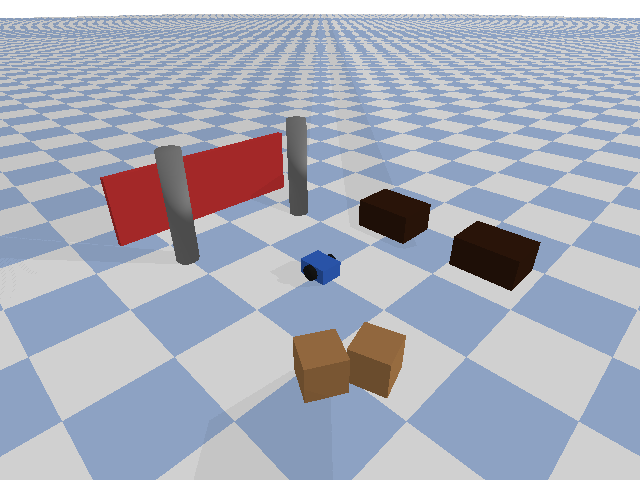

mask shape=(480, 640), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


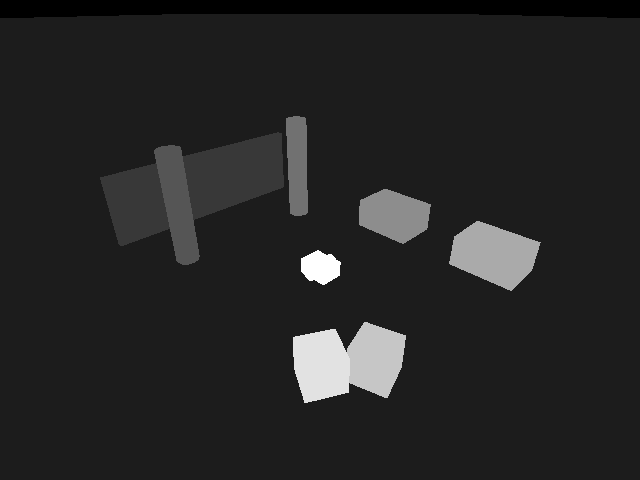

In [ ]:
width = 640
height = 480
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0.5],
        distance=5.0,
        yaw=45,
        pitch=-30,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
#Check the number of bodies we have in the simulation.
print(f"  Total bodies in simulation: {p.getNumBodies()}")

print("=" * 40)
print("POSITION 1: Robot at Center [0, 0, 0.1]")
print("=" * 40)

display(Image.fromarray(rgba, 'RGBA'))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

#### POSITION 2: Robot at the back left

In [ ]:
#remove the robot at first position
p.removeBody(r_2_wheel_x1)

# POSITION 2: Robot at the left
print("POSITION 2: Robot at the back left [-0.5, 0.8, 0.1]")
r_2_wheel_x2= p.loadURDF('urdf_models/robot.urdf',[-0.5, 0.8, 0.1], p.getQuaternionFromEuler([0, 0, -1.2]))

#Check the number of bodies we have in the simulation (should be 9).
print(f"  Total bodies in simulation: {p.getNumBodies()}")

POSITION 2: Robot at the back left [-0.5, 0.8, 0.1]
  Total bodies in simulation: 9


rgba shape=(480, 640, 4), dtype=uint8
  Total bodies in simulation: 9
POSITION 2: Robot at the back left [-0.5, 0.8, 0.1]


/tmp/ipython-input-3795164036.py:33: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


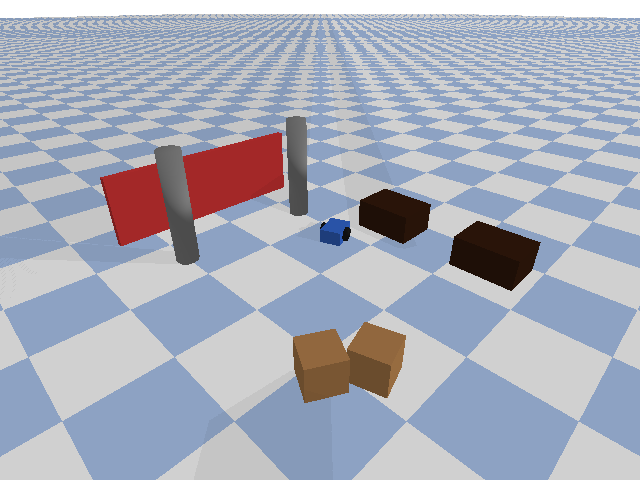

mask shape=(480, 640), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


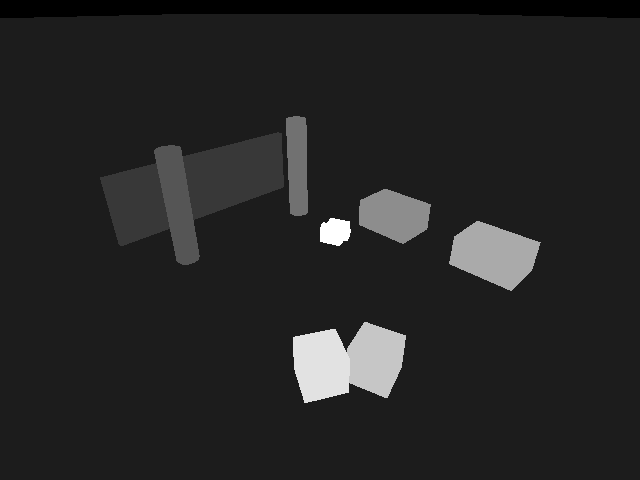

In [ ]:
width = 640
height = 480
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0.5],
        distance=5.0,
        yaw=45,
        pitch=-30,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
#Check the number of bodies we have in the simulation.
print(f"  Total bodies in simulation: {p.getNumBodies()}")

print("=" * 40)
print("POSITION 2: Robot at the back left [-0.5, 0.8, 0.1]")
print("=" * 40)

display(Image.fromarray(rgba, 'RGBA'))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))

#### POSITION 3: Robot at the right

In [ ]:
#remove the robot at first position
p.removeBody(r_2_wheel_x2)

# POSITION 3: Robot at the right
print("POSITION 3: Robot at the right [0, -1.2, 0.1]")
r_2_wheel_x3= p.loadURDF('urdf_models/robot.urdf',[0, -1.2, 0.1], p.getQuaternionFromEuler([0, 0, -1.2]))

#Check the number of bodies we have in the simulation (should be 9).
print(f"Total bodies in simulation: {p.getNumBodies()}")

POSITION 3: Robot at the right [0, -1.2, 0.1]
Total bodies in simulation: 9


rgba shape=(480, 640, 4), dtype=uint8
  Total bodies in simulation: 9
POSITION 3: Robot at the right [0, -1.2, 0.1]


/tmp/ipython-input-2228928263.py:33: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


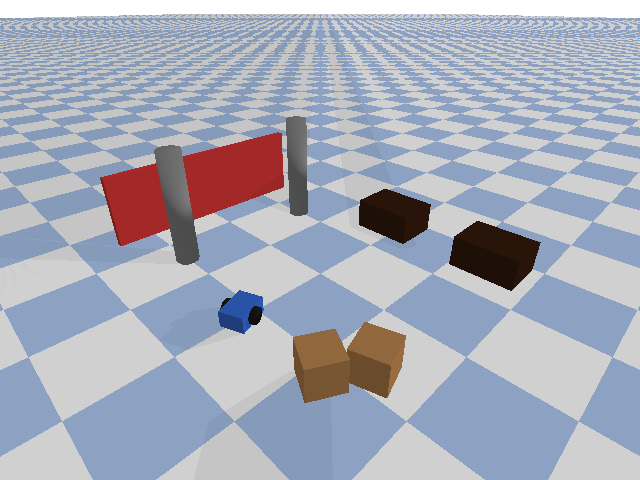

mask shape=(480, 640), dtype=int32, as unique values from 0 to N-1 entities, and -1 as None


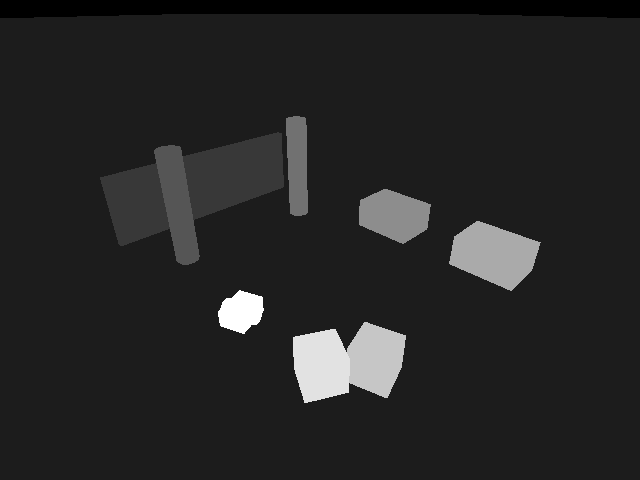

In [ ]:
width = 640
height = 480
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[0, 0, 0.5],
        distance=5.0,
        yaw=45,
        pitch=-30,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr
print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
#Check the number of bodies we have in the simulation.
print(f"  Total bodies in simulation: {p.getNumBodies()}")

print("=" * 40)
print("POSITION 3: Robot at the right [0, -1.2, 0.1]")
print("=" * 40)

display(Image.fromarray(rgba, 'RGBA'))
print(f"mask shape={mask.shape}, dtype={mask.dtype}, as unique values from 0 to N-1 entities, and -1 as None")
display(Image.fromarray(np.interp(mask, (-1, mask.max()), (0, 255)).astype('uint8')))